# Seaborn 한번에 제대로 배우기


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.__version__

'0.11.0'

In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

## 분포 시각화(Distribution Visualization)

### 일변량 분포(Univariate distributions)

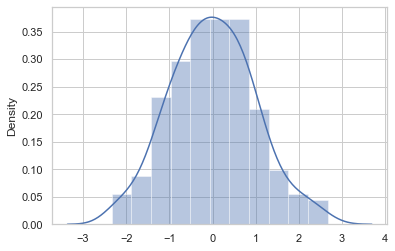

In [3]:
x = np.random.randn(200)
sns.distplot(x);

#### 히스토그램(Histograms)

kde = 대신에 rug= 로

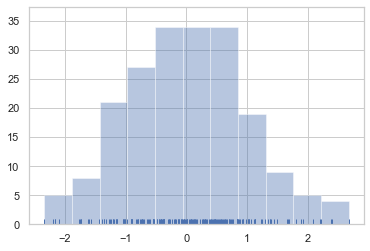

In [4]:
sns.distplot(x, kde=False, rug=True);

bins=

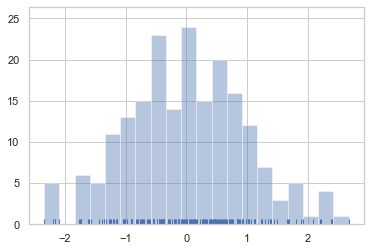

In [5]:
sns.distplot(x, kde=False, rug=True, bins=20);

#### 커널 밀도 추정(Kernel density estimation)

distplot에서  

hist= 를 죽이고 kde 를 살리면

kdeplot 이 된다 .

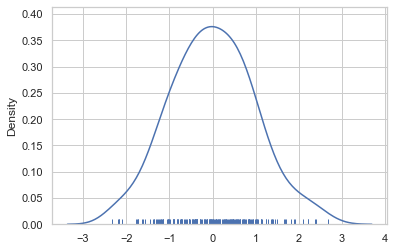

In [6]:
sns.distplot(x, hist=False, rug=True);

#### kdeplot
shade=

색칠하기

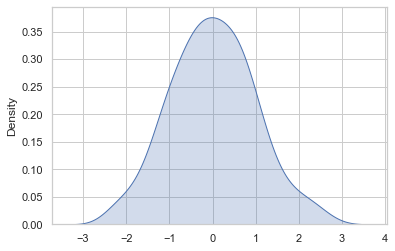

In [7]:
sns.kdeplot(x, shade=True);

#### bw 


커널의 크기 조절


bandwidth 조절 

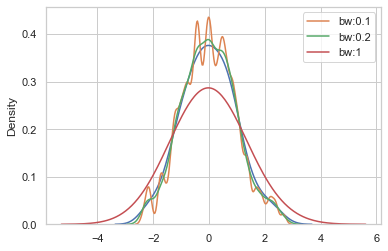

In [8]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.1, label='bw:0.1')
sns.kdeplot(x, bw=.2, label='bw:0.2')
sns.kdeplot(x, bw=1, label='bw:1')
plt.legend();

#### cut

끝부분 잘라주기

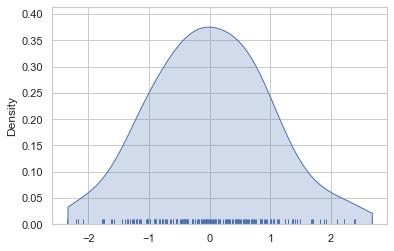

In [9]:
sns.kdeplot(x, shade=True, cut=0);
sns.rugplot(x);

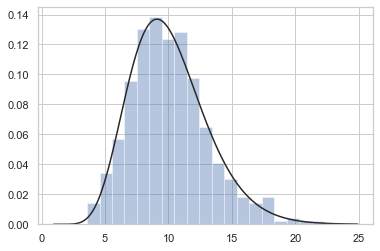

In [10]:
x = np.random.gamma(10, size=500)
sns.distplot(x, kde=False, fit=stats.gamma);

### 이변량 분포(Bivariate distributions)

#### 산점도(Scatterplots)

* `jointplot`: 두 개의 변수 간의 이변량(또는 joint) 관계와 별도의 축에 각각의 일변량(또는 marginal) 분포가 모두 표시되는 다중 패널 플롯 생성

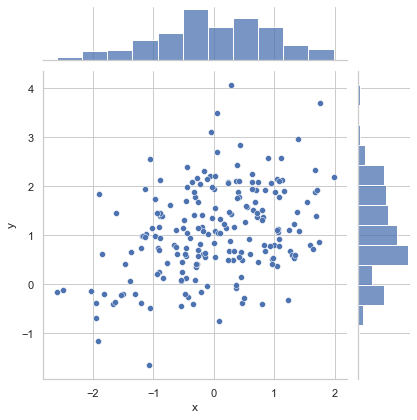

In [11]:
mean = [0, 1]
cov = [ (1, .3), (.3, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

sns.jointplot(x='x', y='y', data=df);

#### 육각 빈 플롯(Hexbin plots)

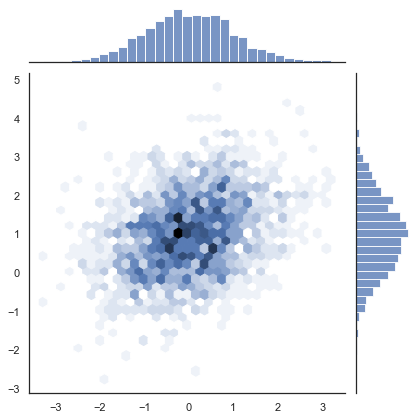

In [12]:
mean = [0, 1]
cov = [ (1, .3), (.3, 1)]
x, y = np.random.multivariate_normal(mean, cov, 2000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind='hex')

#### 커널 밀도 추정(Kernel density estimation)

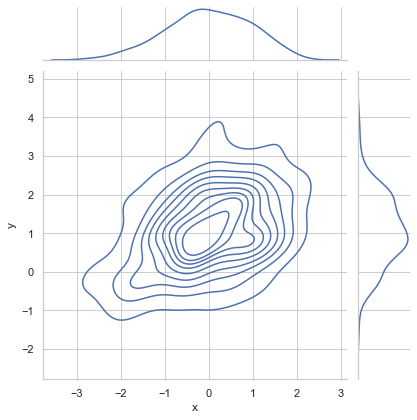

In [13]:
sns.jointplot(x='x', y='y', data=df, kind='kde');

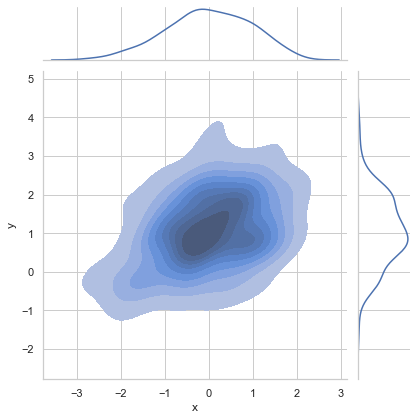

In [14]:
sns.jointplot(x='x', y='y', data=df, kind='kde',shade=True);

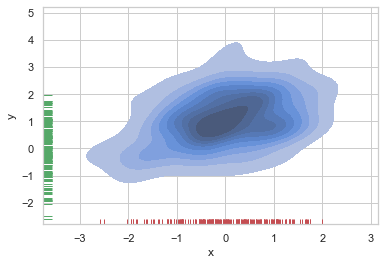

In [15]:
sns.kdeplot(df.x, df.y, shade=True)
sns.rugplot(df.x, color='r')
sns.rugplot(df.x, color='g', vertical=True);

#### palette

<AxesSubplot:xlabel='x', ylabel='y'>

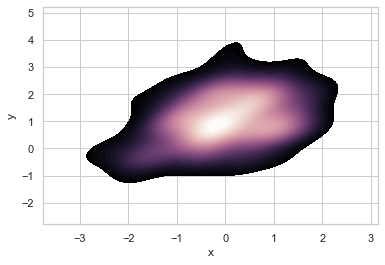

In [16]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, 
            n_levels=60, shade=True)

thresh, levels

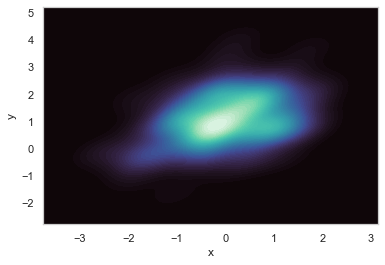

In [17]:
sns.kdeplot(df.x, df.y, thresh=0.0, levels=100,
            cmap='mako', n_levels=60, shade=True);

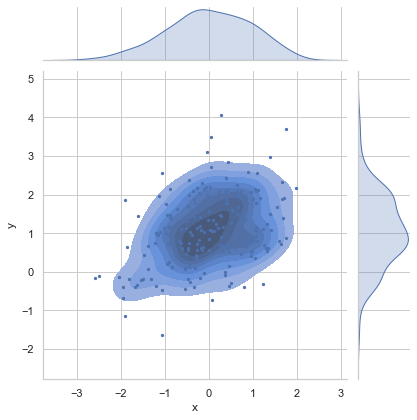

In [18]:
g = sns.jointplot(x='x', y='y', data=df, kind='kde', fill=True)
g.plot_joint(plt.scatter, s=20, linewidth=1, marker='.')
g.ax_joint.collections[0].set_alpha(0)

### 페어와이즈 관계 시각화(Visualizing pairwise relationships)

In [19]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


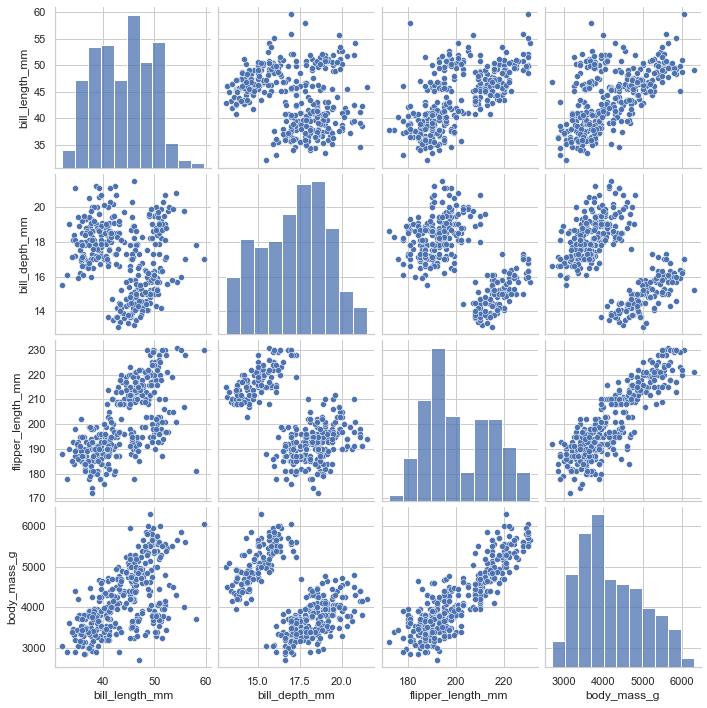

In [20]:
sns.pairplot(penguins);

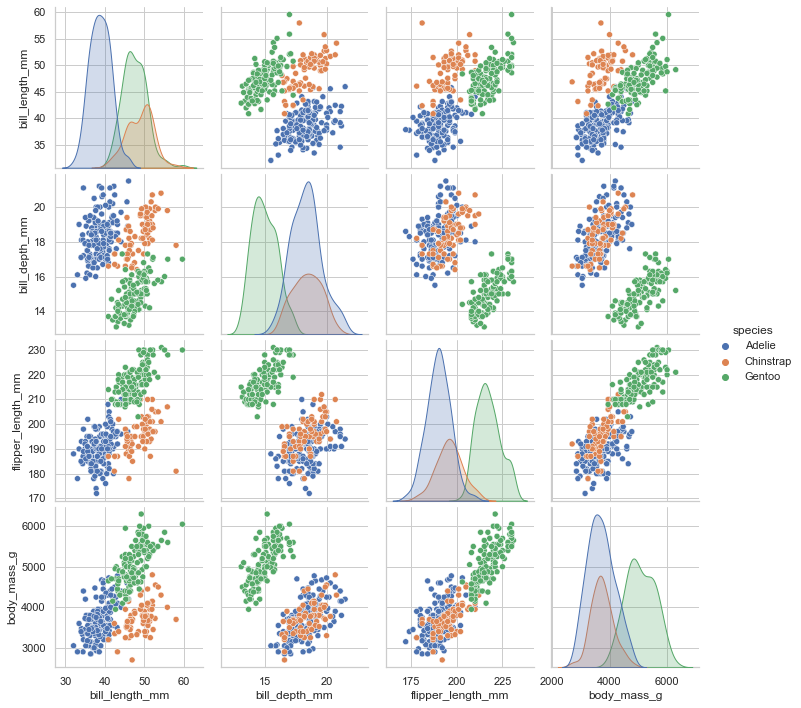

In [21]:
sns.pairplot(penguins, hue='species');

패어 플롯 구조에서 kde 형식으로 나타내는 

Pair Grid

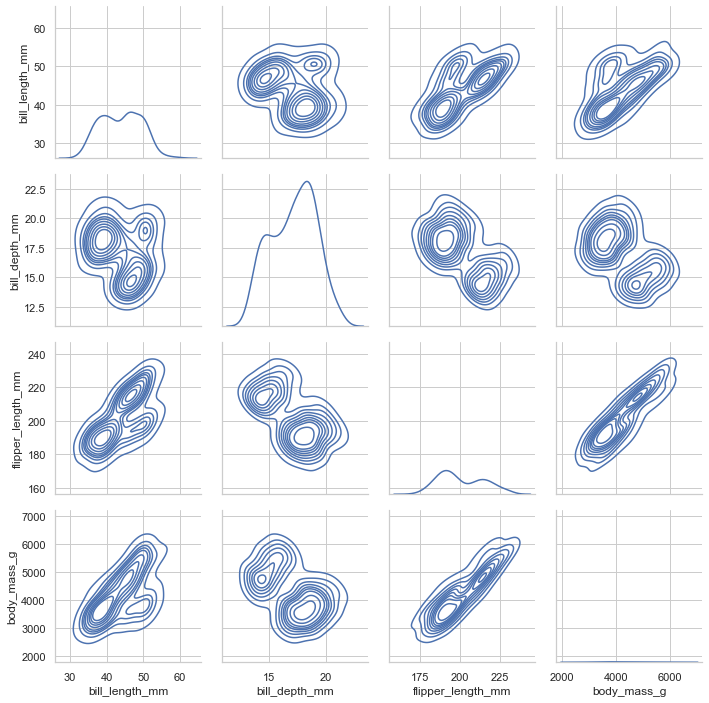

In [22]:
g = sns.PairGrid(penguins)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_level=6);

### 히트맵(Heat Map) & 클러스터맵(Cluster Map)

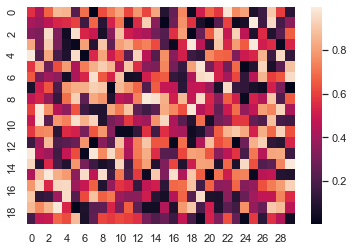

In [23]:
udata = np.random.rand(20, 30)
sns.heatmap(udata);

##### vmin, vmax

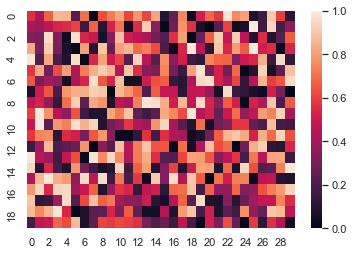

In [24]:
sns.heatmap(udata, vmin=0, vmax=1);

ceter= 기준값 설정

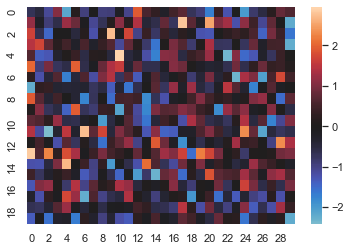

In [25]:
ndata=np.random.randn(20, 30)
sns.heatmap(ndata, center=0);

In [26]:
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


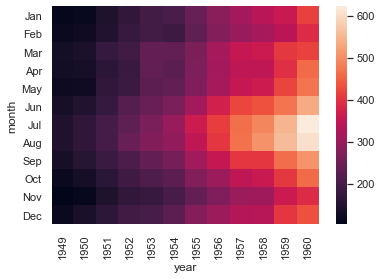

In [27]:
flights = flights.pivot('month', 'year', 'passengers')
sns.heatmap(flights);

##### annot = 

anotation 표시

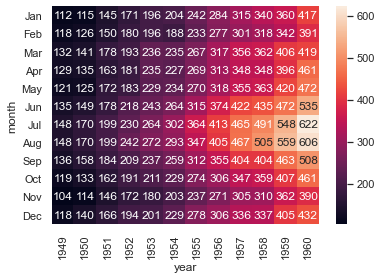

In [28]:
sns.heatmap(flights, annot=True, fmt='d');

##### linewidths =   서로 칸에 구분 넣어 주기

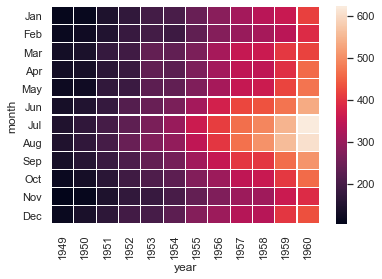

In [29]:
sns.heatmap(flights, linewidths=.2);

##### cmap=

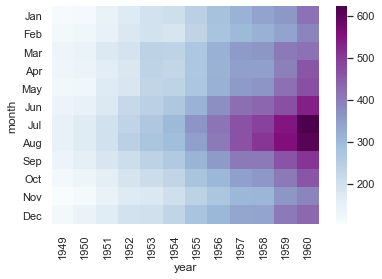

In [30]:
sns.heatmap(flights, cmap="BuPu");

cbar= 설정

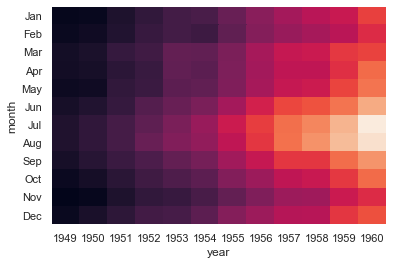

In [31]:
sns.heatmap(flights, cbar=False);

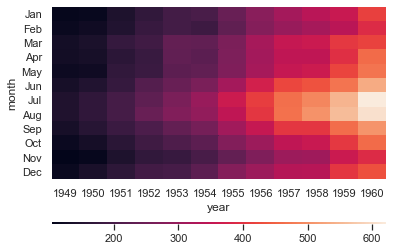

In [32]:
grid_kws = {"height_ratios": (.9, 0.01), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                        cbar_ax=cbar_ax,
                        cbar_kws={"orientation":"horizontal"})

In [33]:
brain_networks = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)
brain_networks

network           1                     2                     3             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1         55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219  -3.670537   1.442261 -19.680431 -29.109356   
916      -33.554138 -38.605621 -25.664803 -30.252352   5.562785  20.182186   
917      -78.539566 -74.197189 -54.041595 -39.970291 -14.277059 -30.606461   
918     -103.235825 -98.744286 -40.109543 -44.907734  12.109148   1.621340   
919      -36.288868 -10.762070 -30.356262 -23.319504  14.252188 -27.559860   

network          4                     5             ...          16  \
node             1                     1             ...           3   
hemi            lh         rh         lh         rh  ...          rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...    0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...   57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...   28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...   71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...   95.597565   
..             ...        ...        ...        ...  ...         ...   
915      -3.376562  -8.764893   0.017912 -25.305094  ...   58.285793   
916      17.911247  24.653582 -32.935612 -21.783203  ...   59.864819   
917      60.628521  62.027023 -32.800556 -37.021500  ...   68.767868   
918      33.765560  55.356071 -14.330512 -17.224781  ...  103.155251   
919      17.279512 -19.060152  26.558777  21.377319  ...  102.086304   

network                                 17                                   \
node              4                      1                     2              
hemi             lh          rh         lh         rh         lh         rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   
..              ...         ...        ...        ...        ...        ...   
915       68.557411   22.833048  76.179489  51.934669  -6.614513  -6.690762   
916       23.004578    7.657463  50.962399  13.696922  63.503616  57.401176   
917       49.664017   64.551498  43.800747   8.144480  47.281460  70.499649   
918      106.454849    9.046827  46.674419  40.954796   0.877180  37.577152   
919       80.051140   -2.642610 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 62 columns]

In [34]:
brain_networks.columns

MultiIndex([( '1', '1', 'lh'),
            ( '1', '1', 'rh'),
            ( '2', '1', 'lh'),
            ( '2', '1', 'rh'),
            ( '3', '1', 'lh'),
            ( '3', '1', 'rh'),
            ( '4', '1', 'lh'),
            ( '4', '1', 'rh'),
            ( '5', '1', 'lh'),
            ( '5', '1', 'rh'),
            ( '6', '1', 'lh'),
            ( '6', '1', 'rh'),
            ( '6', '2', 'lh'),
            ( '6', '2', 'rh'),
            ( '7', '1', 'lh'),
            ( '7', '1', 'rh'),
            ( '7', '2', 'lh'),
            ( '7', '2', 'rh'),
            ( '7', '3', 'lh'),
            ( '7', '3', 'rh'),
            ( '8', '1', 'lh'),
            ( '8', '1', 'rh'),
            ( '8', '2', 'lh'),
            ( '8', '2', 'rh'),
            ( '8', '3', 'lh'),
            ( '8', '3', 'rh'),
            ( '9', '1', 'lh'),
            ( '9', '1', 'rh'),
            ('10', '1', 'lh'),
            ('10', '1', 'rh'),
            ('11', '1', 'lh'),
            ('11', '1', 'rh'),
        

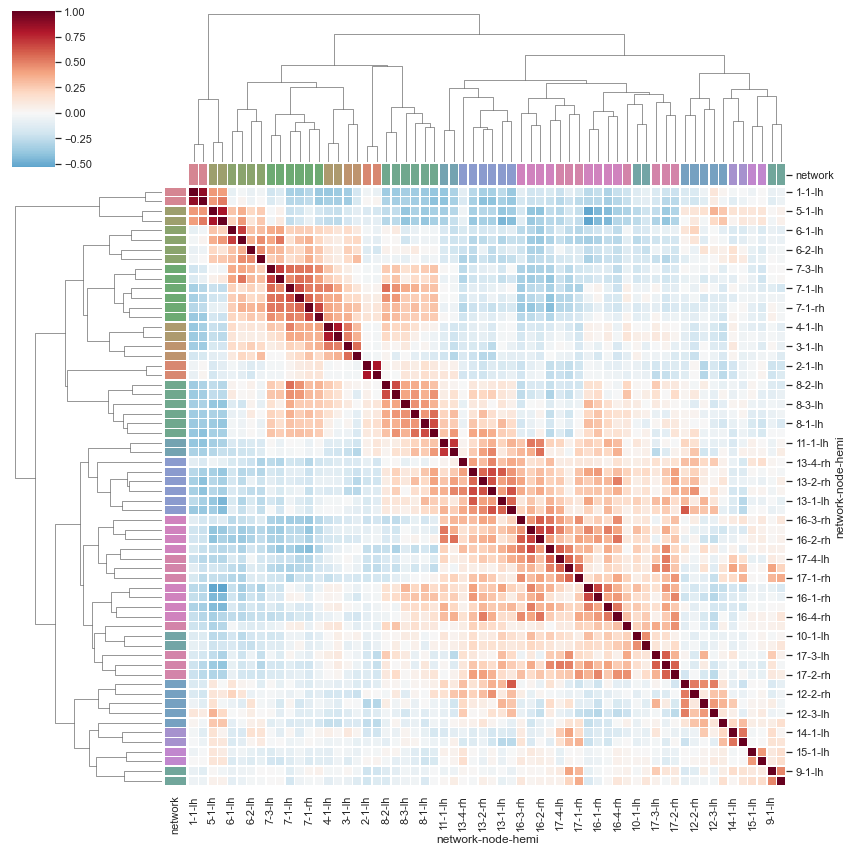

In [35]:
networks = brain_networks.columns.get_level_values('network')
used_networks = np.arange(1, 18)
used_columns = (networks.astype(int).isin(used_networks))
brain_networks = brain_networks.loc[:, used_columns]

network_pal = sns.husl_palette(17, s=.5)
network_lut = dict(zip(map(str, used_networks), network_pal))
network_colors = pd.Series(networks, index=brain_networks.columns).map(network_lut)


sns.clustermap( brain_networks.corr(), center=0, cmap='RdBu_r',
                     row_colors=network_colors, col_colors=network_colors,
                     linewidth=.5 , figsize=(12, 12));


참고문헌
* Seaborn, https://seaborn.pydata.orgl
* Igor Milovanovi, "Python Data Visualization Cookbook", Packt
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly
